In [107]:
from typing import ClassVar
from abc import ABC, abstractmethod

#### Name: Alejandro Rodriguez Josue Velazco Rodriguez

#### Activity 1
```txt
Actividad relacionada con la lección 5:
El objetivo de esta actividad es crear un pequeño código para gestionar el
préstamo y devolución de los libros y revistas de una biblioteca. Los libros de
la biblioteca tienen un código interno, el título del libro y un código ISBN,
mientras que las revistas tienen un código interno, el título de la revista y el
número de la revista. Además, este código debe permitir el préstamo y la
devolución de los libros y revistas de la biblioteca.
Este código debe poder ser utilizado por el siguiente fragmento de código
```

In [108]:
# Superclase o Clase Padre Abstracta
class BibliotecaItem(ABC):
    """Clase abstracta para representar un ítem genérico de una biblioteca."""
     
    num_totales: ClassVar[int] = 0
    num_prestados: ClassVar[int] = 0

    def __init__(self, codigo_interno: str, titulo: str):
        """
        Inicializa un nuevo ítem de biblioteca.
        
        Args:
            codigo_interno (str): Código único del ítem.
            titulo (str): Título del ítem.
        """
        self._codigo_interno = codigo_interno
        self._titulo = titulo
        self._prestado = False
        BibliotecaItem.increment_num_totales()

    @classmethod
    def increment_num_totales(cls) -> None:
        """Incrementa el número total de ítems."""
        cls.num_totales += 1

    @classmethod
    def decrement_num_totales(cls) -> None:
        """Decrementa el número total de ítems."""
        cls.num_totales -= 1
    
    @classmethod
    def increment_num_prestados(cls) -> None:
        """Incrementa el número de ítems prestados."""
        cls.num_prestados += 1
    
    @classmethod
    def decrement_num_prestados(cls) -> None:
        """Decrementa el número de ítems prestados."""
        cls.num_prestados -= 1

    @property
    def codigo_interno(self) -> str:
        """Obtiene el código interno del ítem."""
        return self._codigo_interno

    @codigo_interno.setter
    def codigo_interno(self, codigo_interno: str) -> None:
        """Establece el código interno del ítem."""
        self._codigo_interno = codigo_interno

    @property
    def titulo(self) -> str:
        """Obtiene el título del ítem."""
        return self._titulo

    @titulo.setter
    def titulo(self, titulo: str) -> None:
        """Establece el título del ítem."""
        self._titulo = titulo

    @property
    def prestado(self) -> bool:
        """Indica si el ítem está prestado."""
        return self._prestado

    @prestado.setter
    def prestado(self, prestado: bool) -> None:
        """Establece si el ítem está prestado."""
        self._prestado = prestado

    def prestar(self) -> None:
        """Marca el libro como prestado si no lo está ya."""
        if not self._prestado:
            self._prestado = True
            BibliotecaItem.increment_num_prestados()
            print(f"{self._codigo_interno} - PRESTADO")
        else:
            print(f"{self._codigo_interno} ya está prestado")

    def devolver(self) -> None:
        """Devuelve el libro, si está prestado."""
        if self._prestado:
            self._prestado = False
            BibliotecaItem.decrement_num_prestados()
            print(f"{self._codigo_interno} - DEVUELTO")
        else:
            print(f"{self._codigo_interno} no está prestado")

    @abstractmethod
    def __str__(self) -> str:
        """Retorna una representación de cadena del ítem. Método abstracto que debe implementarse en las subclases."""
        pass


In [109]:
class Libro(BibliotecaItem):
    """Clase que representa un libro en la biblioteca, hereda de BibliotecaItem."""

    num_libros_totales: ClassVar[int] = 0

    def __init__(self, codigo_interno: str, titulo: str, isbn: str):
        """
        Inicializa un nuevo libro.
        
        Args:
            codigo_interno (str): Código único del libro.
            titulo (str): Título del libro.
            isbn (str): ISBN del libro.
        """
        super().__init__(codigo_interno, titulo)
        self._isbn = isbn
        Libro.increment_num_libros_totales()

    @property
    def isbn(self) -> str:
        """Obtiene el ISBN del libro."""
        return self._isbn

    @classmethod
    def increment_num_libros_totales(cls) -> None:
        """Incrementa el número total de libros."""
        cls.num_libros_totales += 1

    def __str__(self) -> str:
        estado = "PRESTADO" if self._prestado else "NO PRESTADO"
        return f"{self._codigo_interno} - {self._titulo} - {estado} ({self._isbn})"

In [110]:
class Revista(BibliotecaItem):
    """Clase que representa una revista en la biblioteca, hereda de BibliotecaItem."""

    num_revistas_totales: ClassVar[int] = 0

    def __init__(self, codigo_interno: str, titulo: str, numero: str):
        """
        Inicializa una nueva revista.
        
        Args:
            codigo_interno (str): Código único de la revista.
            titulo (str): Título de la revista.
            numero (str): Número de la revista.
        """
        super().__init__(codigo_interno, titulo)
        self._numero = numero
        Revista.increment_num_revistas_totales()

    @property
    def numero(self) -> str:
        """Obtiene el número de la revista."""
        return self._numero

    @classmethod
    def increment_num_revistas_totales(cls) -> None:
        """Incrementa el número total de revistas."""
        cls.num_revistas_totales += 1

    # Override de metodo __str__ para mostrar el estado de la revista
    def __str__(self) -> str:
        estado = "PRESTADO" if self.prestado else "NO PRESTADO"
        return f"{self.codigo_interno} - {self.titulo} - {estado} ({self.numero})"

In [111]:
from io import StringIO
import sys
import pytest
import ipytest
ipytest.autoconfig()

In [112]:
# Utility to capture the printed output
class OutputCapture:
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self

    def __exit__(self, *args):
        self.output = self._stringio.getvalue()
        sys.stdout = self._stdout

def test_output_matches():
    with OutputCapture() as capture:
        libro1 = Libro("L1_123", "La Bestia", "9788408249849")
        print("Mi primer libro es: ", libro1)
        print("Número ejemplares totales:", libro1.num_totales)
        print("Número libros totales:", libro1.num_libros_totales)
        print("Número ejemplares prestados:", libro1.num_prestados, "\n")

        libro2 = Libro("L2_345", "Últimos días en Berlín", "9788408249856")
        print("Mi segundo libro es: ", libro2)
        print("Número ejemplares totales:", libro1.num_totales)
        print("Número libros totales:", libro1.num_libros_totales)
        print("Número ejemplares prestados:", libro1.num_prestados, "\n")

        revista1 = Revista("R1_JDJ", "National Geographic", "5")
        print("Mi primera revista es: ", revista1)
        print("Número ejemplares totales:", revista1.num_totales)
        print("Número revistas totales:", revista1.num_revistas_totales)
        print("Número ejemplares prestados:", revista1.num_prestados, "\n")

        revista2 = Revista("R2_ADA", "National Geographic", "23")
        print("Mi segunda revista es: ", revista2)
        print("Número ejemplares totales:", revista1.num_totales)
        print("Número revistas totales:", revista1.num_revistas_totales)
        print("Número ejemplares prestados:", revista1.num_prestados, "\n")

        # Simulate actions
        revista1.prestar()
        libro1.prestar()
        print("Número ejemplares prestados:", libro1.num_prestados)
        libro1.devolver()
        print("Número ejemplares prestados:", libro1.num_prestados, "\n")

    # Convert the captured output to lines and assert line by line
    output_lines = [line.strip() for line in capture.output.strip().split('\n') if line.strip()]
    expected_lines = [
        "Mi primer libro es:  L1_123 - La Bestia - NO PRESTADO (9788408249849)",
        "Número ejemplares totales: 1",
        "Número libros totales: 1",
        'Número ejemplares prestados: 0',
        "Mi segundo libro es:  L2_345 - Últimos días en Berlín - NO PRESTADO (9788408249856)",
        "Número ejemplares totales: 2",
        "Número libros totales: 2",
        'Número ejemplares prestados: 0',
        "Mi primera revista es:  R1_JDJ - National Geographic - NO PRESTADO (5)",
        'Número ejemplares totales: 3',
        "Número revistas totales: 1",
        "Número ejemplares prestados: 0",
        "Mi segunda revista es:  R2_ADA - National Geographic - NO PRESTADO (23)",
        'Número ejemplares totales: 4',
        "Número revistas totales: 2",
        "Número ejemplares prestados: 0",
        "R1_JDJ - PRESTADO",
        "L1_123 - PRESTADO",
        'Número ejemplares prestados: 2',
        "L1_123 - DEVUELTO",
        'Número ejemplares prestados: 1',
    ]

    # Assert line by line, skipping empty lines
    for i, (output_line, expected_line) in enumerate(zip(output_lines, expected_lines)):
        assert output_line == expected_line, f"Line {i+1} did not match. Expected: '{expected_line}', Got: '{output_line}'"

ipytest.run('-vv')

======================================= test session starts ========================================
platform darwin -- Python 3.9.6, pytest-8.3.3, pluggy-1.5.0 -- /Users/alejandrovelazco/work/personal/master_python/pcap/pcap-recuperate-activity/.venv/bin/python
cachedir: .pytest_cache
rootdir: /Users/alejandrovelazco/work/personal/master_python/pcap/pcap-recuperate-activity
collecting ... collected 1 item

t_3fe9ef40d9664157b0bda4039e01b4d3.py::test_output_matches PASSED                            [100%]

======================================== 1 passed in 0.01s =========================================


<ExitCode.OK: 0>

#### Activity 2
Las preguntas sobre clases y herencia son muy comunes en el examen de
certificación PCAP, por lo que con esta actividad se pretende trabajar en los
diferentes conceptos vistos en esta lección. En esta actividad debes enviar
para cada pregunta la opción u opciones correctas, así como una breve
explicación de tu elección. Es importante que no te olvides de enviar la
breve explicación de tu elección
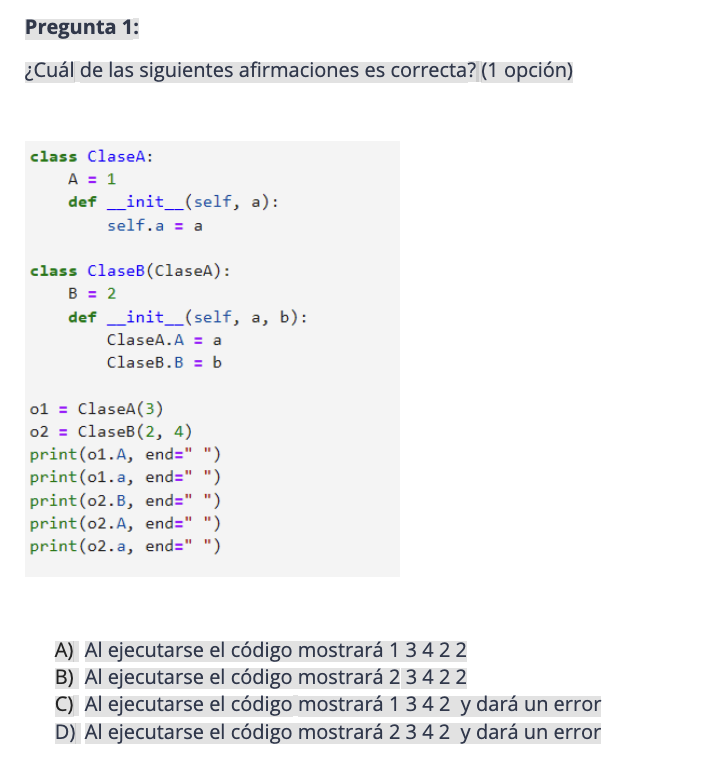

In [119]:
class ClaseA:
    A = 1
    def __init__(self, a):
        self.a = a

class ClaseB(ClaseA):
    B = 2
    def __init__(self, a, b):
        
        ClaseA.A = a
        ClaseB.B = b

o1 = ClaseA(3)
o2 = ClaseB(2,4)
print(o1.A, end =" ")
print(o1.a, end =" ")
print(o2.B, end =" ")
print(o2.A , end = " ")
try: 
    print(o2.a , end = " ")
except AttributeError:
    print("Error , No existe el atributo a en ClaseB")

2 3 4 2 Error , No existe el atributo a en ClaseB


R1 = Al comprobar la ejecucion del codigo vemos que la respuesta correcta es la D , ya que nunca se llama el constructor de la clase padre (ClaseA) con: 
```python 
super().__init__(a)
```
en la claseB

Certificación PCAP 4
Pregunta 1:
¿Cuál de las siguientes afirmaciones es correcta? (1 opción)
- A) Al ejecutarse el código mostrará 1 3 4 2 2
- B) Al ejecutarse el código mostrará 2 3 4 2 2
- C) Al ejecutarse el código mostrará 1 3 4 2 y dará un error
- D) Al ejecutarse el código mostrará 2 3 4 2 y dará un error
Pregunta 2:
Para el siguiente fragmento de código, seleccione la afirmación u
afirmaciones correctas (una o varias opciones)
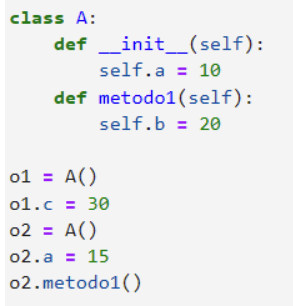
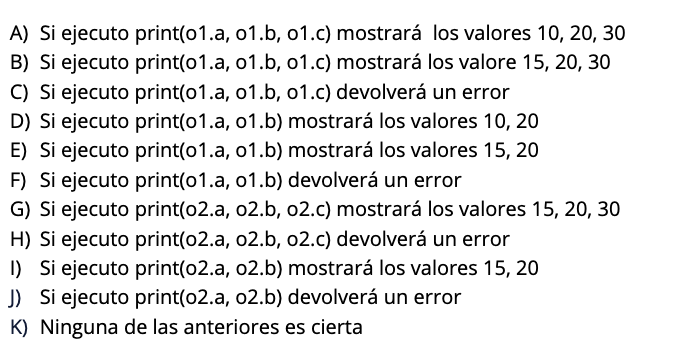

In [122]:
class A:
    def __init__(self):
        self.a = 10 
    def metodo1(self):
        self.b = 20
o1 = A()
o1.c = 30
o2 = A()
o2.a = 15
o2.metodo1()

In [127]:
#A) False, Ocurre un error porque el atributo b no ha sido inicializado en el objeto o1 , esto tambien afecta a la pregunta B) y hace que la C) sea verdadera
print(o1.a, o1.b, o1.c)


AttributeError: 'A' object has no attribute 'b'

In [128]:
#D) False , Ocurre un error porque el atributo b no ha sido inicializado en el objeto o1 , esto tambien afecta a la pregunta E) y hace que la F) sea verdadera
print(o1.a, o1.b)

AttributeError: 'A' object has no attribute 'b'

In [129]:
#G) False y hace que H sea verdadero
print(o2.a, o2.b, o2.c)

AttributeError: 'A' object has no attribute 'c'

In [131]:
#I ) Verdadera y hace que la J sea false
print(o2.a, o2.b)

15 20


Las respuestas verdaderas son:
- C
- F
- I

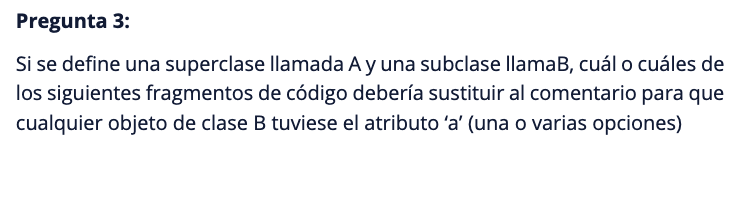  

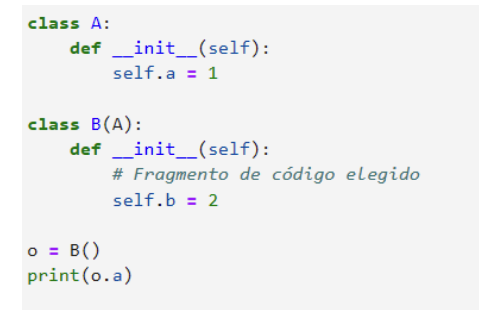  

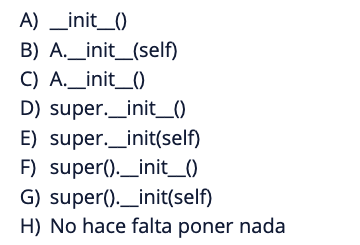

In [137]:
class A:
    def __init__(self):
        self.a = 10

class B(A):
    def __init__(self):
        A.__init__(self)
        self.b = 20
o = B()
print(o.a)
# La repuesta correcta es la B (A.__init__(self) ) , ya que se esta llamando al constructor de la clase padre A

10


La respuesta correcta es la B) 

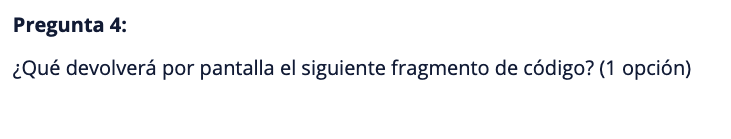  

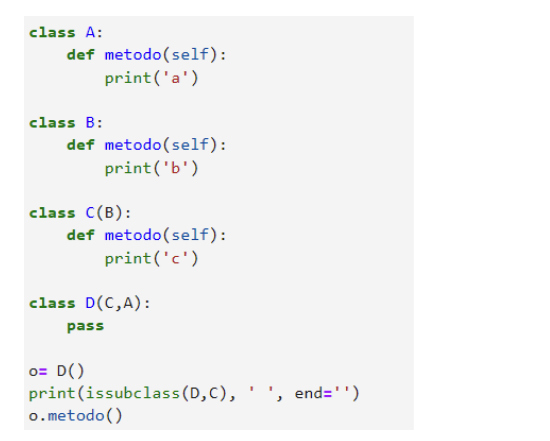  
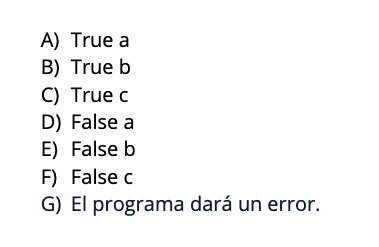

In [138]:
class A:
    def metodo(self):
        print("a")

class B:
    def metodo(self):
        print("b")

class C(B) :
    def metodo(self):
        print("c")

class D(C,A):
    pass
o = D()

print(issubclass(D,C), " ", end ='')
o.metodo()

True  c


Es la C) debido a:

    •	issubclass(D, C) devuelve True porque D hereda de C.
    •	o.metodo() imprime "c" porque el método metodo de C es el primero que se encuentra en el MRO.
